# WeatherPy
Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator by utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
# import dependencies

import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pprint import pprint
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm
from api_keys import weather_api_key

# import citipy to generate city lat/lng
from citipy import citipy

# create output for csv
output_data_file = "burns_cities.csv"

# set lat/lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create List of Cities
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
 # create lists for cities & Lat/lng
lat_lngs = []
cities = []

# need set of random lat/lng
latitudes = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longitudes = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(latitudes, longitudes)

# pull cities according to above
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # make sure cities aren't added twice
    if city not in cities:
        cities.append(city)

#confirm city count
len(cities)

611

# API Calls for City Weather Data
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.

In [3]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create a list for the City Data
city_data = []

# Print log
print("Beginning Data Retrieval")
print ("-" * 15)


# Create record count 
record_count = 1
set_count = 1

# Loop through cities
for index, city in enumerate(cities):
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    #API requests for each city
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append data to the city data
        city_data.append({
            "City" :city,
            "Latitude" :city_lat,
            "Longitude" :city_lng,
            "Temperature" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Wind Speed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass

        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | akyab
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | floro
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | eureka
Processing Record 8 of Set 1 | zabid
Processing Record 9 of Set 1 | tahta
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | lujan
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | mercedes
Processing Record 16 of Set 1 | samusu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | puri
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | torbay
Processing Recor

Processing Record 20 of Set 4 | khonuu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 21 of Set 4 | ekhabi
Processing Record 22 of Set 4 | bethel
Processing Record 23 of Set 4 | san jose
Processing Record 24 of Set 4 | coahuayana
Processing Record 25 of Set 4 | ivankiv
Processing Record 26 of Set 4 | puerto del rosario
Processing Record 27 of Set 4 | vila velha
Processing Record 28 of Set 4 | katangli
Processing Record 29 of Set 4 | airai
Processing Record 30 of Set 4 | belmonte
Processing Record 31 of Set 4 | bolungarvik
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 32 of Set 4 | dikson
Processing Record 33 of Set 4 | hudesti
Processing Record 34 of Set 4 | ziarat
Processing Record 35 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | baykit
Processi

Processing Record 29 of Set 7 | letterkenny
Processing Record 30 of Set 7 | buala
Processing Record 31 of Set 7 | rehoboth
Processing Record 32 of Set 7 | zhigansk
Processing Record 33 of Set 7 | shimanovsk
Processing Record 34 of Set 7 | koygorodok
Processing Record 35 of Set 7 | leningradskiy
Processing Record 36 of Set 7 | vestmannaeyjar
Processing Record 37 of Set 7 | lebu
Processing Record 38 of Set 7 | yeniseysk
Processing Record 39 of Set 7 | jadu
Processing Record 40 of Set 7 | belyy yar
Processing Record 41 of Set 7 | am timan
Processing Record 42 of Set 7 | balkanabat
Processing Record 43 of Set 7 | shipunovo
Processing Record 44 of Set 7 | gladstone
Processing Record 45 of Set 7 | santa rosa
Processing Record 46 of Set 7 | waipawa
Processing Record 47 of Set 7 | envira
Processing Record 48 of Set 7 | cabo san lucas
Processing Record 49 of Set 7 | nuristan
Processing Record 0 of Set 8 | mpophomeni
Processing Record 1 of Set 8 | vaitupu
City not found. Skipping ...
-----------

Processing Record 6 of Set 11 | nurota
Processing Record 7 of Set 11 | kupang
Processing Record 8 of Set 11 | elbistan
Processing Record 9 of Set 11 | deputatskiy
Processing Record 10 of Set 11 | santa marinella
Processing Record 11 of Set 11 | harper
Processing Record 12 of Set 11 | nsanje
Processing Record 13 of Set 11 | iki-burul
Processing Record 14 of Set 11 | semnan
Processing Record 15 of Set 11 | hervey bay
Processing Record 16 of Set 11 | yeppoon
Processing Record 17 of Set 11 | hede
Processing Record 18 of Set 11 | santa maria
Processing Record 19 of Set 11 | lesogorskiy
Processing Record 20 of Set 11 | richards bay
Processing Record 21 of Set 11 | karaidel
Processing Record 22 of Set 11 | sebinkarahisar
Processing Record 23 of Set 11 | ocara
Processing Record 24 of Set 11 | shiyan
Processing Record 25 of Set 11 | umzimvubu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 26 of Set 11 | siare
City not found

In [4]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Latitude"]
max_temps = city_data_df["Temperature"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City           568
Latitude       568
Longitude      568
Temperature    568
Humidity       568
Cloudiness     568
Wind Speed     568
Country        568
Date           568
dtype: int64

# Create Cities.csv
Save a CSV of all retrieved data

In [5]:
filepath = "burns_cities.csv"
df = pd.read_csv(filepath)


df.head()

,City_ID,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ambon,-3.70,128.18,75.0,16,95,9.53,ID,1604786147
1,1,cayenne,4.93,-52.33,78.8,100,75,1.12,GF,1604785564
2,2,akyab,20.15,92.90,76.1,87,0,5.99,MM,1604786147
3,3,jamestown,42.10,-79.24,66.2,37,1,6.93,US,1604786147
4,4,floro,61.60,5.03,46.4,93,80,1.12,NO,1604786147


In [6]:
df.shape 

(568, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_ID      568 non-null    int64  
 1   City         568 non-null    object 
 2   Latitude     568 non-null    float64
 3   Longitude    568 non-null    float64
 4   Temperature  568 non-null    float64
 5   Humidity     568 non-null    int64  
 6   Cloudiness   568 non-null    int64  
 7   Wind Speed   568 non-null    float64
 8   Country      564 non-null    object 
 9   Date         568 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.5+ KB


In [8]:
df.describe() 

,City_ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,283.500000,20.392817,21.531373,57.658451,72.667254,49.005282,8.097606,1.604786e+09
std,164.111751,33.897748,89.030072,22.994522,20.435476,39.083616,6.030423,1.596294e+02
min,0.000000,-54.800000,-175.200000,-15.720000,1.000000,0.000000,0.180000,1.604785e+09
25%,141.750000,-8.810000,-54.770000,41.880000,62.000000,3.000000,3.875000,1.604786e+09
50%,283.500000,25.875000,27.595000,63.955000,78.000000,46.000000,6.930000,1.604786e+09
75%,425.250000,50.122500,96.565000,77.000000,88.000000,90.000000,10.317500,1.604786e+09
max,567.000000,78.220000,179.320000,98.600000,100.000000,100.000000,56.370000,1.604786e+09


# Scatter Plots
Create a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude, 
Humidity (%) vs. Latitude, 
Cloudiness (%) vs. Latitude, 
Wind Speed (mph) vs. Latitude

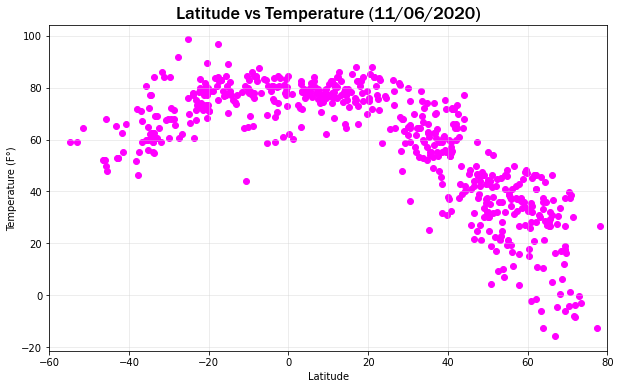

In [9]:
#This plot is showcasing a linear relationshipt between latitude and Temprature. 
#The slope indicates that temprature goes up as we near the equator and back down as we move away from it.


plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

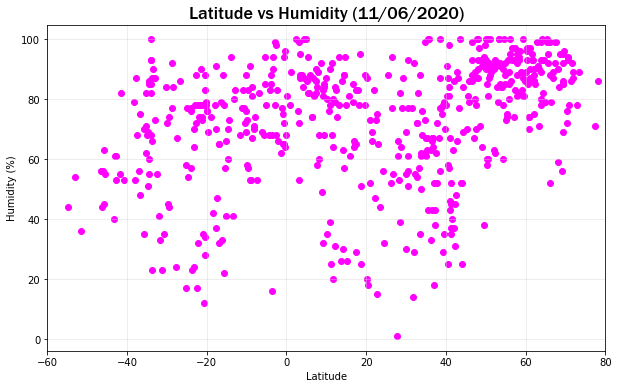

In [10]:
#This plot is demonstarting that there is little to no relationship between latitude and humidity.
#humidity appears to be spread out widely

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "magenta")
plt.title("Latitude vs Humidity (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

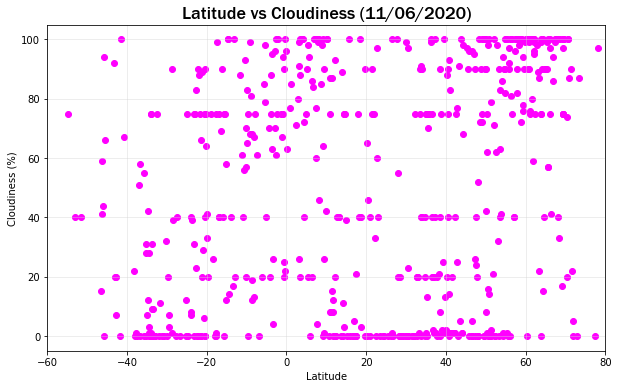

In [11]:
#This plot is demonstarting that there is a slight linear relationship to cloudiness and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "magenta")
plt.title("Latitude vs Cloudiness (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

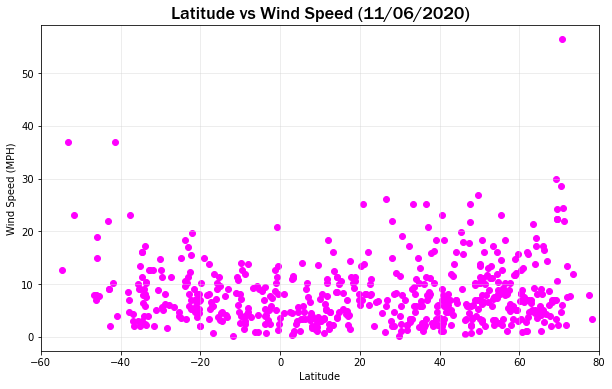

In [12]:
#This plot is demonstarting that there is a slight linear relationship to wind speed and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes
    
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "magenta")
plt.title("Latitude vs Wind Speed (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

# Linear Regression
Run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude, 
Southern Hemisphere - Temperature (F) vs. Latitude, 
Northern Hemisphere - Humidity (%) vs. Latitude, 
Southern Hemisphere - Humidity (%) vs. Latitude, 
Northern Hemisphere - Cloudiness (%) vs. Latitude, 
Southern Hemisphere - Cloudiness (%) vs. Latitude, 
Northern Hemisphere - Wind Speed (mph) vs. Latitude, 
Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [13]:
#create hemisphere data frame

df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City_ID,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere_NS,Hemisphere_WE
0,0,ambon,-3.70,128.18,75.0,16,95,9.53,ID,1604786147,Southern,Eastern
1,1,cayenne,4.93,-52.33,78.8,100,75,1.12,GF,1604785564,Northern,Western
2,2,akyab,20.15,92.90,76.1,87,0,5.99,MM,1604786147,Northern,Eastern
3,3,jamestown,42.10,-79.24,66.2,37,1,6.93,US,1604786147,Northern,Western
4,4,floro,61.60,5.03,46.4,93,80,1.12,NO,1604786147,Northern,Eastern


In [14]:
corrs = df.corr()
corrs

,City_ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
City_ID,1.000000,-0.007195,0.064823,0.015204,0.012445,-0.009689,-0.067832,0.333599
Latitude,-0.007195,1.000000,-0.068576,-0.693661,0.325374,0.226732,0.053274,0.061781
Longitude,0.064823,-0.068576,1.000000,-0.163315,0.192469,0.073346,-0.160447,0.120695
Temperature,0.015204,-0.693661,-0.163315,1.000000,-0.412607,-0.203126,-0.060871,-0.061029
Humidity,0.012445,0.325374,0.192469,-0.412607,1.000000,0.326731,-0.071223,0.002906
Cloudiness,-0.009689,0.226732,0.073346,-0.203126,0.326731,1.000000,0.076258,-0.040454
Wind Speed,-0.067832,0.053274,-0.160447,-0.060871,-0.071223,0.076258,1.000000,-0.052405
Date,0.333599,0.061781,0.120695,-0.061029,0.002906,-0.040454,-0.052405,1.000000


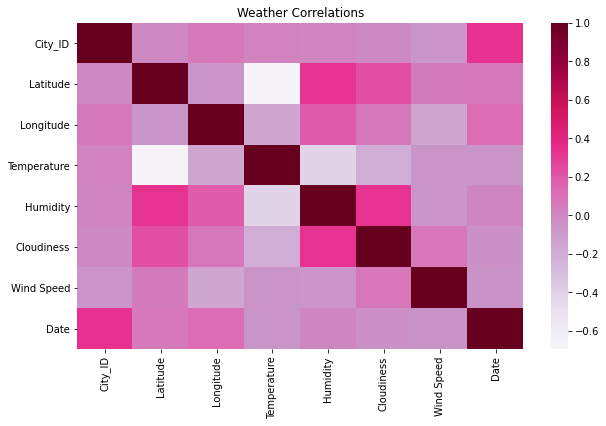

In [15]:
#visualize the data - helpful

plt.figure(figsize=(10,6))

sns.heatmap(corrs, cmap="PuRd")

plt.title("Weather Correlations")
plt.show()

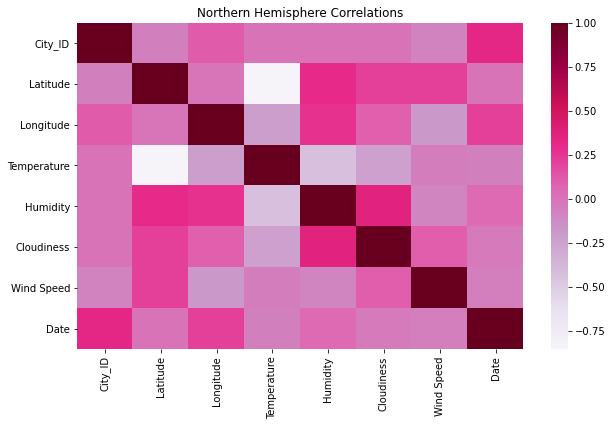

In [16]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2,cmap="PuRd")

plt.title("Northern Hemisphere Correlations")
plt.show()

In [17]:
target = df.Temperature
feature = df.Latitude

In [18]:
# created stats model - defining x & y

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     524.9
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.09e-82
Time:                        15:57:14   Log-Likelihood:                -2399.9
No. Observations:                 568   AIC:                             4804.
Df Residuals:                     566   BIC:                             4813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2542      0.812     82.831      0.000      65.659      68.849
Latitude      -0.4705      0.021    -22.911      0.000      -0.511      -0.430
==============================================================================
Omnibus:                       34.709   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.114
Skew:                          -0.649   Prob(JB):                     1.95e-09
Kurtosis:                       2.893   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#create line regression

slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.47x + 67.25'

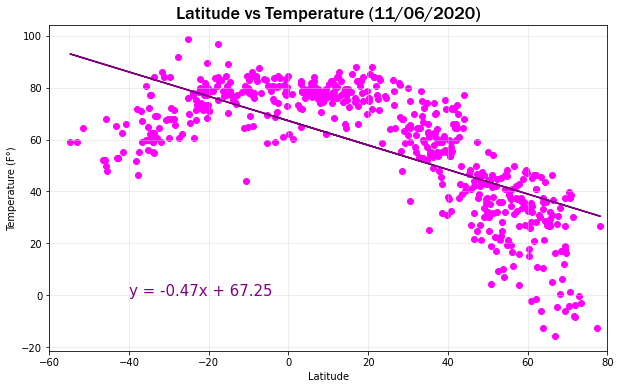

In [20]:
#create overall latitude v. temprature for comparison to N/S hempispheres - demonstrates the linear relationship

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.plot(feature, regress_values, color="purple")
plt.annotate(line_eq,(-40, 0),fontsize=15,color="purple")

plt.show()

In [21]:
#create line regression models for graphs

def doRegressionWork(hemisphere, df, inp_target):
    #filter to the correct hemispheres
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # grab the equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # create visualization
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "magenta")
    plt.title(f"Latitude vs {inp_target}(11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="purple")

    plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1045.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          5.09e-112
Time:                        15:57:14   Log-Likelihood:                -1533.9
No. Observations:                 389   AIC:                             3072.
Df Residuals:                     387   BIC:                             3080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.3181      1.401     65.174      0.0

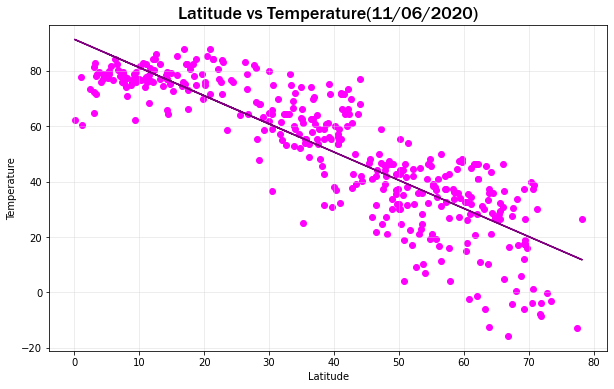

In [22]:
doRegressionWork("Northern", df, "Temperature") 

#demonstrates the negative linear realationship between latitude and temprature.
#the higher the higher the latitude in the Northern Hemisphere, the lower the temprature.

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           4.04e-19
Time:                        15:57:15   Log-Likelihood:                -633.89
No. Observations:                 179   AIC:                             1272.
Df Residuals:                     177   BIC:                             1278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5468      1.198     68.926      0.0

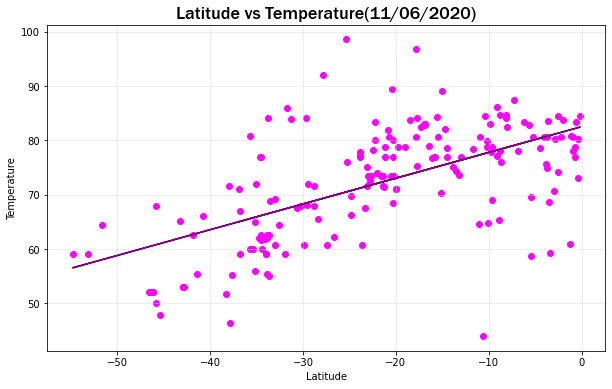

In [23]:
doRegressionWork("Southern", df, "Temperature") 
#demonstrates the negative linear realationship between latitude and temprature.
#the lower the latitude in the Southern Hemisphere, the lower the temprature.
#opposite of the above result

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     38.84
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.20e-09
Time:                        15:57:15   Log-Likelihood:                -1701.4
No. Observations:                 389   AIC:                             3407.
Df Residuals:                     387   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.5431      2.155     29.481      0.0

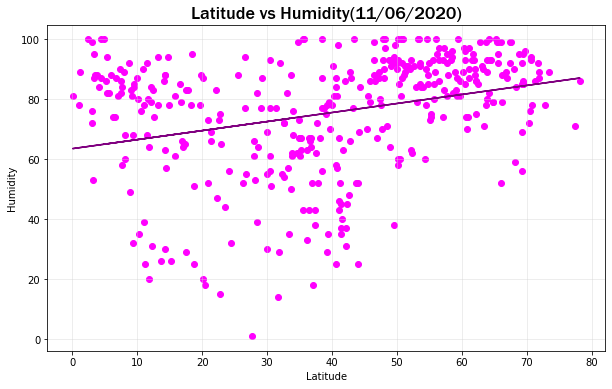

In [24]:
doRegressionWork("Northern", df, "Humidity") 
#demonstrates a slight linear relationship, humidity is most present in higher latitudes of the Northern Hemisphere

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000529
Time:                        15:57:15   Log-Likelihood:                -780.77
No. Observations:                 179   AIC:                             1566.
Df Residuals:                     177   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.6501      2.721     27.437      0.0

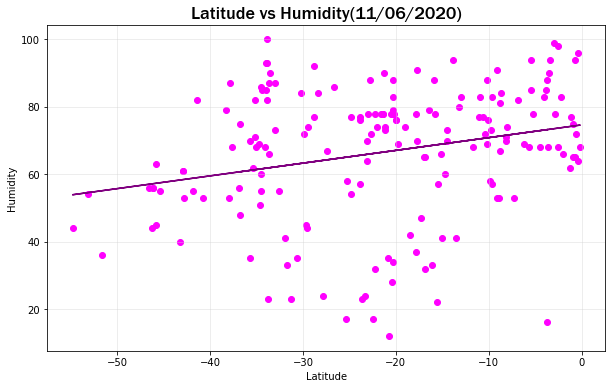

In [25]:
doRegressionWork("Southern", df, "Humidity") 
#Humidity is most present in lower latitudes of the Southern Hemisphere
#like many of the scattre plots, the Northern & Southern hemispsheres are opposing

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.99e-05
Time:                        15:57:16   Log-Likelihood:                -1983.0
No. Observations:                 389   AIC:                             3970.
Df Residuals:                     387   BIC:                             3978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9034      4.446      7.851      0.0

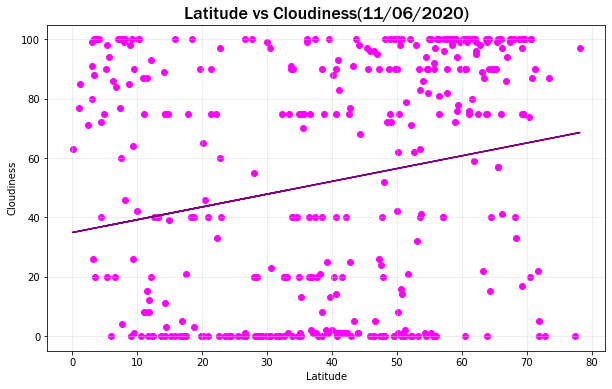

In [26]:
doRegressionWork("Northern", df, "Cloudiness") 
#cloudiness is present across all of the Northern Hemisphere but dereases as you go up in latitude.

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     26.83
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           6.01e-07
Time:                        15:57:16   Log-Likelihood:                -876.18
No. Observations:                 179   AIC:                             1756.
Df Residuals:                     177   BIC:                             1763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.8932      4.636     13.565      0.0

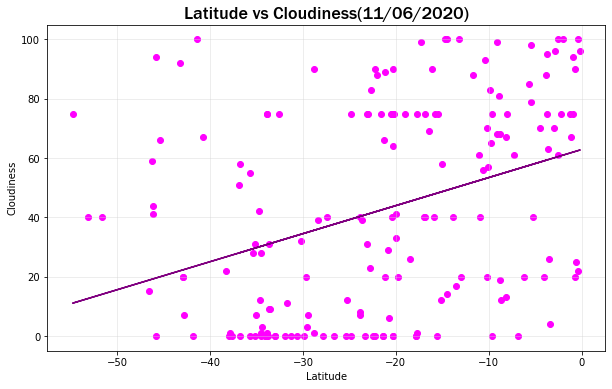

In [27]:
doRegressionWork("Southern", df, "Cloudiness") 
#cloudiness is present across most of the Southern Hemisphere but dereases as you go down in latitude.

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     18.63
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           2.02e-05
Time:                        15:57:17   Log-Likelihood:                -1255.0
No. Observations:                 389   AIC:                             2514.
Df Residuals:                     387   BIC:                             2522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4555      0.684      7.975      0.0

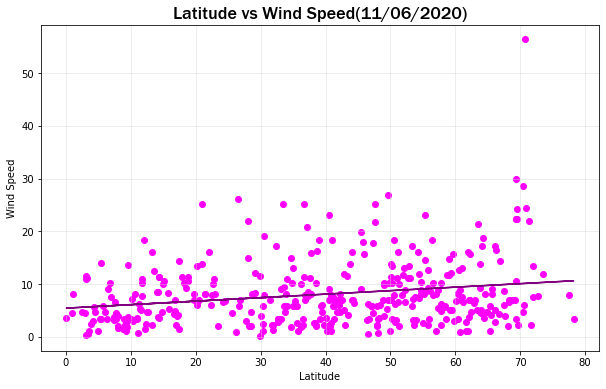

In [28]:
doRegressionWork("Northern", df, "Wind Speed") 
#windspeed is highest closest to the equator

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           2.30e-05
Time:                        15:57:17   Log-Likelihood:                -551.12
No. Observations:                 179   AIC:                             1106.
Df Residuals:                     177   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3245      0.754      7.060      0.0

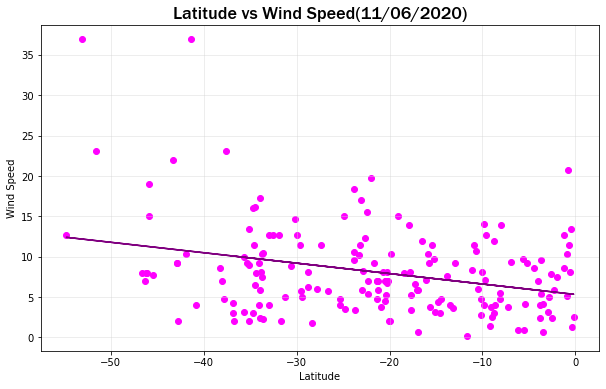

In [29]:
doRegressionWork("Southern", df, "Wind Speed") 
#windspeed is highest closest to the equator